# MAPEO de COVID-19

### Base de datos

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Michael Encalada/Documents/GitHub/Magallanes/week10_spatial/positivos_covid (1).csv", delimiter=';')


In [2]:
print(df.head())


   FECHA_CORTE DEPARTAMENTO  PROVINCIA     DISTRITO METODODX  EDAD       SEXO  \
0     20241203       TUMBES     TUMBES       TUMBES       AG  46.0   FEMENINO   
1     20241203         LIMA       LIMA  JESUS MARIA       AG  69.0   FEMENINO   
2     20241203   SAN MARTIN  MOYOBAMBA    MOYOBAMBA       AG  55.0   FEMENINO   
3     20241203     AREQUIPA   CAYLLOMA    COPORAQUE       AG  50.0  MASCULINO   
4     20241203         LIMA       LIMA  JESUS MARIA       AG  58.0  MASCULINO   

   FECHA_RESULTADO    UBIGEO  id_persona  
0       20221207.0  240101.0    203499.0  
1       20230822.0  150113.0    221397.0  
2       20240108.0  220101.0    295651.0  
3       20230824.0   40506.0    851625.0  
4       20221217.0  150113.0    287786.0  


In [3]:
df=df[df.EDAD>50]

In [4]:
df.METODODX.value_counts()

AG     599842
PCR    400134
PR     293382
Name: METODODX, dtype: int64

In [5]:
# NUEVA VARIABLE "AÑO"

df['FECHA_RESULTADO'] = pd.to_datetime(df['FECHA_RESULTADO'], format='%Y%m%d', errors='coerce')



In [6]:
df['AÑO'] = df['FECHA_RESULTADO'].dt.year


In [7]:
df.AÑO.head()

1    2023.0
2    2024.0
4    2022.0
7    2023.0
9    2020.0
Name: AÑO, dtype: float64

In [8]:
df['AÑO'] = df['AÑO'].astype('Int64') #a numeros enteros

In [9]:
print(df[['AÑO']].head())

    AÑO
1  2023
2  2024
4  2022
7  2023
9  2020


### Agreggate

In [10]:
# AG: Antigenos
# PCR: Prueba molecular
# PR: Prueba rápida serológica

In [11]:
df = df[df['AÑO'] != 1899]

In [12]:
df = df[df['PROVINCIA'] != 'EN INVESTIGACIÓN']

In [13]:
indexList=['AÑO','DEPARTAMENTO','PROVINCIA','METODODX']
aggregator={'METODODX':[len]}
prov=df.groupby(indexList,observed=True).agg(aggregator)
prov

METODODX
                                                 len
AÑO  DEPARTAMENTO PROVINCIA        METODODX         
2020 AMAZONAS     BAGUA            PCR           203
                                   PR           2368
                  BONGARA          PCR            20
                                   PR             92
                  CHACHAPOYAS      PCR            90
...                                              ...
2024 TUMBES       TUMBES           PCR            15
                  ZARUMILLA        PCR             6
     UCAYALI      CORONEL PORTILLO AG             16
                                   PCR            17
                  PADRE ABAD       AG              1

[1886 rows x 1 columns]

In [14]:
#wide
Draft=prov.unstack(3).fillna(0) #leftmost index in rows
Draft

METODODX               
                                             len               
METODODX                                      AG    PCR      PR
AÑO  DEPARTAMENTO PROVINCIA                                    
2020 AMAZONAS     BAGUA                      0.0  203.0  2368.0
                  BONGARA                    0.0   20.0    92.0
                  CHACHAPOYAS                0.0   90.0   419.0
                  CONDORCANQUI               0.0   14.0   540.0
                  LUYA                       0.0    1.0    89.0
...                                          ...    ...     ...
2024 TUMBES       CONTRALMIRANTE VILLAR      0.0    4.0     0.0
                  TUMBES                    11.0   15.0     0.0
                  ZARUMILLA                  0.0    6.0     0.0
     UCAYALI      CORONEL PORTILLO          16.0   17.0     0.0
                  PADRE ABAD                 1.0    0.0     0.0

[920 rows x 3 columns]

In [15]:
# % de personas con prueba AG
Draft['AG_pct']=Draft.iloc[:,1]/(Draft.iloc[:,0] + Draft.iloc[:,1])
prov_Ag=Draft['AG_pct'].unstack('AÑO').fillna(0)
prov_Ag

AÑO                                2020      2021      2022      2023  \
DEPARTAMENTO PROVINCIA                                                  
AMAZONAS     BAGUA             1.000000  0.144654  0.233813  0.240000   
             BONGARA           1.000000  0.291971  0.466019  0.454545   
             CHACHAPOYAS       1.000000  0.448919  0.414784  0.219178   
             CONDORCANQUI      1.000000  0.033333  0.025000  0.000000   
             LUYA              1.000000  0.036585  0.059361  0.111111   
...                                 ...       ...       ...       ...   
TUMBES       ZARUMILLA         0.923077  0.315556  0.492958  0.588235   
UCAYALI      ATALAYA           0.000000  0.000000  0.000000  0.000000   
             CORONEL PORTILLO  0.996875  0.186831  0.503120  0.545455   
             PADRE ABAD        0.000000  0.078512  0.193694  0.000000   
             PURUS             0.000000  0.000000  0.000000  1.000000   

AÑO                                2024  
DEPARTAMENTO PROVINCIA                   
AMAZONAS     BAGUA             0.470588  
             BONGARA           0.928571  
             CHACHAPOYAS       0.322581  
             CONDORCANQUI      0.000000  
             LUYA              0.750000  
...                                 ...  
TUMBES       ZARUMILLA         1.000000  
UCAYALI      ATALAYA           0.000000  
             CORONEL PORTILLO  0.515152  
             PADRE ABAD        0.000000  
             PURUS             0.000000  

[196 rows x 5 columns]

In [16]:
#data type
prov_Ag.columns #esta como numero los años

Index([2020, 2021, 2022, 2023, 2024], dtype='Int64', name='AÑO')

In [17]:
prov_Ag.columns=['year'+str(x) for x in prov_Ag.columns]

In [18]:
prov_Ag

year2020  year2021  year2022  year2023  \
DEPARTAMENTO PROVINCIA                                                  
AMAZONAS     BAGUA             1.000000  0.144654  0.233813  0.240000   
             BONGARA           1.000000  0.291971  0.466019  0.454545   
             CHACHAPOYAS       1.000000  0.448919  0.414784  0.219178   
             CONDORCANQUI      1.000000  0.033333  0.025000  0.000000   
             LUYA              1.000000  0.036585  0.059361  0.111111   
...                                 ...       ...       ...       ...   
TUMBES       ZARUMILLA         0.923077  0.315556  0.492958  0.588235   
UCAYALI      ATALAYA           0.000000  0.000000  0.000000  0.000000   
             CORONEL PORTILLO  0.996875  0.186831  0.503120  0.545455   
             PADRE ABAD        0.000000  0.078512  0.193694  0.000000   
             PURUS             0.000000  0.000000  0.000000  1.000000   

                               year2024  
DEPARTAMENTO PROVINCIA                   
AMAZONAS     BAGUA             0.470588  
             BONGARA           0.928571  
             CHACHAPOYAS       0.322581  
             CONDORCANQUI      0.000000  
             LUYA              0.750000  
...                                 ...  
TUMBES       ZARUMILLA         1.000000  
UCAYALI      ATALAYA           0.000000  
             CORONEL PORTILLO  0.515152  
             PADRE ABAD        0.000000  
             PURUS             0.000000  

[196 rows x 5 columns]

In [19]:
prov_Ag.reset_index(inplace=True)
prov_Ag

,DEPARTAMENTO,PROVINCIA,year2020,year2021,year2022,year2023,year2024
0,AMAZONAS,BAGUA,1.000000,0.144654,0.233813,0.240000,0.470588
1,AMAZONAS,BONGARA,1.000000,0.291971,0.466019,0.454545,0.928571
2,AMAZONAS,CHACHAPOYAS,1.000000,0.448919,0.414784,0.219178,0.322581
3,AMAZONAS,CONDORCANQUI,1.000000,0.033333,0.025000,0.000000,0.000000
4,AMAZONAS,LUYA,1.000000,0.036585,0.059361,0.111111,0.750000
...,...,...,...,...,...,...,...
191,TUMBES,ZARUMILLA,0.923077,0.315556,0.492958,0.588235,1.000000
192,UCAYALI,ATALAYA,0.000000,0.000000,0.000000,0.000000,0.000000
193,UCAYALI,CORONEL PORTILLO,0.996875,0.186831,0.503120,0.545455,0.515152
194,UCAYALI,PADRE ABAD,0.000000,0.078512,0.193694,0.000000,0.000000


## MAPA

In [20]:
mapLink='https://github.com/SocialAnalytics-StrategicIntelligence/GeoDF_Analytics/raw/main/maps/ProvsINEI2023.zip'
#panadas vienen como zip hy, r no puede abrir por si acaso

import geopandas as gpd

provmap=gpd.read_file(mapLink)

provmap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    196 non-null    float64 
 1   CCDD        196 non-null    object  
 2   CCPP        196 non-null    object  
 3   DEPARTAMEN  196 non-null    object  
 4   PROVINCIA   196 non-null    object  
 5   geometry    196 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 9.3+ KB


In [21]:
provmap['location']=['+'.join(x[0]) for x in zip(provmap.iloc[:,3:5].values)]
provmap.head(10)

,OBJECTID,CCDD,CCPP,DEPARTAMEN,PROVINCIA,geometry,location
0,1.0,01,01,AMAZONAS,CHACHAPOYAS,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",AMAZONAS+CHACHAPOYAS
1,2.0,01,02,AMAZONAS,BAGUA,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",AMAZONAS+BAGUA
2,3.0,01,03,AMAZONAS,BONGARA,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",AMAZONAS+BONGARA
3,4.0,01,04,AMAZONAS,CONDORCANQUI,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",AMAZONAS+CONDORCANQUI
4,5.0,01,05,AMAZONAS,LUYA,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",AMAZONAS+LUYA
5,6.0,01,06,AMAZONAS,RODRIGUEZ DE MENDOZA,"POLYGON ((-77.44452 -6.05002, -77.44387 -6.050...",AMAZONAS+RODRIGUEZ DE MENDOZA
6,7.0,01,07,AMAZONAS,UTCUBAMBA,"POLYGON ((-78.09288 -5.36258, -78.09288 -5.364...",AMAZONAS+UTCUBAMBA
7,8.0,02,01,ANCASH,HUARAZ,"POLYGON ((-77.39870 -9.35563, -77.39852 -9.356...",ANCASH+HUARAZ
8,9.0,02,02,ANCASH,AIJA,"POLYGON ((-77.61368 -9.64900, -77.61241 -9.649...",ANCASH+AIJA
9,10.0,02,03,ANCASH,ANTONIO RAYMONDI,"POLYGON ((-77.08856 -8.97496, -77.08804 -8.975...",ANCASH+ANTONIO RAYMONDI


In [22]:
print(prov_Ag.columns)


Index(['DEPARTAMENTO', 'PROVINCIA', 'year2020', 'year2021', 'year2022',
       'year2023', 'year2024'],
      dtype='object')


In [23]:
# Unir las columnas 'departamento' y 'provincia' en una nueva columna 'location'
prov_Ag['location'] = prov_Ag.apply(lambda row: f"{row['DEPARTAMENTO']} + {row['PROVINCIA']}", axis=1)

# Ver las primeras filas para confirmar
prov_Ag.head()


,DEPARTAMENTO,PROVINCIA,year2020,year2021,year2022,year2023,year2024,location
0,AMAZONAS,BAGUA,1.0,0.144654,0.233813,0.240000,0.470588,AMAZONAS + BAGUA
1,AMAZONAS,BONGARA,1.0,0.291971,0.466019,0.454545,0.928571,AMAZONAS + BONGARA
2,AMAZONAS,CHACHAPOYAS,1.0,0.448919,0.414784,0.219178,0.322581,AMAZONAS + CHACHAPOYAS
3,AMAZONAS,CONDORCANQUI,1.0,0.033333,0.025000,0.000000,0.000000,AMAZONAS + CONDORCANQUI
4,AMAZONAS,LUYA,1.0,0.036585,0.059361,0.111111,0.750000,AMAZONAS + LUYA


In [24]:
## Limpieza

In [25]:
#!pip install unidecode


  Obtaining dependency information for unidecode from https://files.pythonhosted.org/packages/84/b7/6ec57841fb67c98f52fc8e4a2d96df60059637cba077edc569a302a8ffc7/Unidecode-1.3.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.5 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.5 kB 487.6 kB/s eta 0:00:01
   ------------- ------------------------- 81.9/235.5 kB 657.6 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/235.5 kB 798.9 kB/s eta 0:00:01
   ------------------------------- ------ 194.6/235.5 kB 841.6 kB/s eta 0:00:01
   -------------------------------------- 235.5/235.5 kB 901.0 kB/s eta 0:00:00


In [26]:
import unidecode

byePunctuation=lambda x: unidecode.unidecode(x)
prov_Ag['location']=prov_Ag['location'].apply(byePunctuation)
provmap['location']=provmap['location'].apply(byePunctuation)

In [27]:
prov_Ag['location']=prov_Ag.location.str.replace("\-|\_|\s+","",regex=True)
provmap['location']=provmap.location.str.replace("\-|\_|\s+","",regex=True)

In [28]:
nomatch_df=set(prov_Ag.location)- set(provmap.location)
nomatch_gdf=set(provmap.location)-set(prov_Ag.location)

In [29]:
len(nomatch_df), len(nomatch_gdf) #!!!

(2, 2)

In [30]:
#!pip install thefuzz

  Obtaining dependency information for thefuzz from https://files.pythonhosted.org/packages/82/4f/1695e70ceb3604f19eda9908e289c687ea81c4fecef4d90a9d1d0f2f7ae9/thefuzz-0.22.1-py3-none-any.whl.metadata
  Obtaining dependency information for rapidfuzz<4.0.0,>=3.0.0 from https://files.pythonhosted.org/packages/fc/0b/b15a8853672e6fca00d83b3a6c037c07ff16a73932a55e69488c46e6b9d7/rapidfuzz-3.10.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.6 MB 667.8 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.6 MB 991.0 kB/s eta 0:00:02
   - -------------------------------------- 0.1/1.6 MB 991.0 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.6 MB 554.9 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.6 MB 919.0 kB/s eta 0:00:02
   ------- -------------------------------- 0

In [31]:
# pick the closest match from nomatch_gdf for a value in nomatch_df
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[('ANCASH+ANTONIORAIMONDI', ('ANCASH+ANTONIORAYMONDI', 95)),
 ('ICA+NAZCA', ('ICA+NASCA', 89))]

In [32]:
# Diccionario de cambios
{dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

{'ANCASH+ANTONIORAIMONDI': 'ANCASH+ANTONIORAYMONDI', 'ICA+NAZCA': 'ICA+NASCA'}

In [33]:
# then:
changesinDF={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

In [34]:
prov_Ag.replace({'location': changesinDF}, inplace=True)

In [35]:
# comprobamos

In [36]:
nomatch_df=set(prov_Ag.location)- set(provmap.location)
nomatch_gdf=set(provmap.location)-set(prov_Ag.location)

[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[]

In [37]:
#merge
prov_Ag_map=provmap.merge(prov_Ag, on='location',how='left',indicator='flag')


In [38]:
prov_Ag_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      196 non-null    float64 
 1   CCDD          196 non-null    object  
 2   CCPP          196 non-null    object  
 3   DEPARTAMEN    196 non-null    object  
 4   PROVINCIA_x   196 non-null    object  
 5   geometry      196 non-null    geometry
 6   location      196 non-null    object  
 7   DEPARTAMENTO  196 non-null    object  
 8   PROVINCIA_y   196 non-null    object  
 9   year2020      196 non-null    float64 
 10  year2021      196 non-null    float64 
 11  year2022      196 non-null    float64 
 12  year2023      196 non-null    float64 
 13  year2024      196 non-null    float64 
 14  flag          196 non-null    category
dtypes: category(1), float64(6), geometry(1), object(7)
memory usage: 23.3+ KB


In [39]:
prov_Ag_map['flag']=prov_Ag_map.flag.astype(str)


In [40]:
#
bye=['DEPARTAMEN', 'PROVINCIA_x', 'CCPP','CCDD']
prov_Ag_map.drop(columns=bye,inplace=True)
prov_Ag_map.head()

,OBJECTID,geometry,location,DEPARTAMENTO,PROVINCIA_y,year2020,year2021,year2022,year2023,year2024,flag
0,1.0,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",AMAZONAS+CHACHAPOYAS,AMAZONAS,CHACHAPOYAS,1.0,0.448919,0.414784,0.219178,0.322581,both
1,2.0,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",AMAZONAS+BAGUA,AMAZONAS,BAGUA,1.0,0.144654,0.233813,0.240000,0.470588,both
2,3.0,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",AMAZONAS+BONGARA,AMAZONAS,BONGARA,1.0,0.291971,0.466019,0.454545,0.928571,both
3,4.0,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",AMAZONAS+CONDORCANQUI,AMAZONAS,CONDORCANQUI,1.0,0.033333,0.025000,0.000000,0.000000,both
4,5.0,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",AMAZONAS+LUYA,AMAZONAS,LUYA,1.0,0.036585,0.059361,0.111111,0.750000,both


In [41]:
# lidiar con los CEROS
prov_Ag_map.fillna(0,inplace=True)

Guardar el geoDF

In [43]:
#crear carpeta maps, donde guardar

import os
prov_Ag_map.to_file(os.path.join('C:/Users/Michael Encalada/Documents/GitHub/Magallanes/week10_spatial/maps/',"provinciasPeru.gpkg"), layer='provinciasDengue', driver="GPKG")

### Explorar variables

In [44]:
# statistics
prov_Ag_map.year2022.describe()

count    196.000000
mean       0.125021
std        0.161102
min        0.000000
25%        0.016327
50%        0.068471
75%        0.170919
max        1.000000
Name: year2022, dtype: float64

In [45]:
#! pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 308.0 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 312.2 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 370.8 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 370.8 kB/s eta 0:00:01
   --------------

<Axes: xlabel='year2022'>

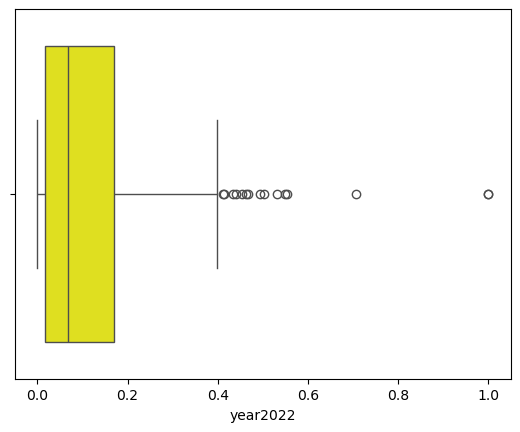

In [46]:
# grafico
import seaborn as sea

sea.boxplot(prov_Ag_map.year2022, color='yellow',orient='h')

Imterpretación: El 74% de las provincias no llegan al 40% de realización de pruebas antigenas para detectar covid 19.

<Axes: >

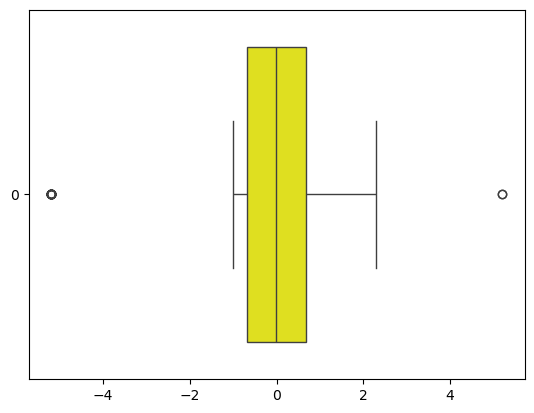

In [49]:
#grafica de trasnformacion cuantilica?
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=100, random_state=0,output_distribution='normal')
qt_result=qt.fit_transform(prov_Ag_map[['year2022']])
sea.boxplot(qt_result, color='yellow',orient='h')

Explicación: Transofrmador quantilico: evita que los atipicos sesguen los resultados No estas eliminando los atipicos, lo estas normalizando haciendolo parte de la distribución.
En todo la politica publica, hay que pensar en lo intervinible. Necesito algo que sea operable. Lo hago viendo al grupo donde se puede trabajr. Eso es el amarillo

In [50]:
prov_Ag_map['year_2022_qt']= qt_result

## Correlación Espacial

Vecindario

In [51]:
#!pip install pysal 
#conda install -c conda-forge pysal

^C
  Obtaining dependency information for pysal from https://files.pythonhosted.org/packages/d8/53/5597ffb9c9847b4e468d584445ad44cea1633429f01d20cc5f481e8d048a/pysal-24.7-py3-none-any.whl.metadata
  Obtaining dependency information for geopandas>=0.10.0 from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for libpysal>=4.12.0 from https://files.pythonhosted.org/packages/fd/b0/744e3d450813c645cd092147bd72a7bdec0e3f4c1c4f5e3ff663252c7027/libpysal-4.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for access>=1.1.9 from https://files.pythonhosted.org/packages/5d/e0/be59a75ad3d0b0fea7f8c6c55439772c4bb791406f3653aa25880ec68d7f/access-1.1.9-py3-none-any.whl.metadata
  Obtaining dependency information for esda>=2.6.0 from https://files.pythonhosted.org/packages/a0/1b/84eaa84fa0e2b56464665f1d2135e0afe8ab1df481e6aa1fcdcb480032d6/esda-2.6.0-py3-

In [ ]:
import numpy as np
print(np.__version__)

In [ ]:
pip uninstall numpy

In [ ]:
pip install numpy==1.23.4

In [ ]:
from libpysal.weights import Queen, Rook, KNN

In [ ]:
# rook
w_rook = Rook.from_dataframe(prov_Ag_map,use_index=False)

In [ ]:
# queen
w_queen = Queen.from_dataframe(prov_Ag_map,use_index=False)

In [ ]:
# k nearest neighbors
w_knn = KNN.from_dataframe(prov_Ag_map, k=8) #quiero 8 mas cercanos a mi.

### Moran's correlation

In [ ]:
# needed for spatial correlation
w_queen.transform = 'R'

In [ ]:
pd.DataFrame(*w_queen.full()).sum(axis=1) # 1 means both are neighbors

INDICE DE MORAN

Quiero ver si hay correlacion entre mi vecindario con dengue. Caunto dengue hay en mi barro

ojo: que a veces la frecuencia entre personas (redes) va mas alla del espacio. frecuentas con un grupo a pesar de distancias.

In [ ]:
from esda.moran import Moran

moranCOVID = Moran(prov_Ag_map['year_2022_qt'], w_queen)
moranCOVID.I,moranCOVID.p_sim

#correlacion a 0.51 y es significativa por es 0.001 ***

interpretacion: Si sale no significativo, significa que el virus no tiene una variable espacial. no tiene efecto La cercania no tiene una relacion con el territorio. Vota en contra de keiko, porque done vivo mis vecinos tambien votan en contra de keiko

Grafico

In [ ]:
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt

fig, ax = moran_scatterplot(moranCOVID)
ax.set_xlabel('Covid_prueba_share')
ax.set_ylabel('SpatialLag_Covid_prueba_share')

Interpretacion: a parte de la linea, si no tambien los cuadrantes Los que estan a la izquierda, abajo, son provincias donde el dengue esta bajo y hay cercania entre provincias bajo.

A la izquierda arriba, es dengue alto con vecinos cercanas con dengue alto. A la derecha abajo, no contagiados, casi asilados.

izquierda abajo COLD SPOT ARRIB derecha, hot spot

Otro grafico

In [ ]:
# The scatterplot with local info

from esda.moran import Moran_Local

# calculate Moran_Local and plot
lisaCOVID = Moran_Local(y=prov_Ag_map['year_2022_qt'], w=w_knn,seed=2022)
fig, ax = moran_scatterplot(lisaCOVID,p=0.05)
ax.set_xlabel('Dengue_alarma_share')
ax.set_ylabel('SpatialLag_Dengue_alarma_share');

Mapa de peru

In [ ]:
# the map with the spots and outliers

from splot.esda import lisa_cluster
f, ax = plt.subplots(1, figsize=(12, 12))
plt.title('Spots and Outliers')
fig = lisa_cluster(lisaCOVID,
                   prov_Ag_map,ax=ax,
                   legend_kwds={'loc': 'center left',
                                'bbox_to_anchor': (0.7, 0.6)})